<center><br> <img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 300px;"></center><br>

<img src="https://logos-world.net/wp-content/uploads/2021/02/Expedia-Emblem.png" style="width: 300px;margin-top: 30px;" align="left">
   <div><center><h1>Projeto: Expedia Hotel Recommendations</h1></center></div>
   <div><center><h4>Processamento de Big Data  -   2¬∫ Semestre | 2022/23</h4></center></div>
   <div><center><b>Docentes:</b> Jo√£o Oliveira <b>|</b> Adriano Lopes</center></div>
 <br>
    <div><center><h4>Grupo 17</h4></center> </div>
    <div><center> Andr√© Silvestre N¬∫104532 <b>|</b> Rita Matos N¬∫104936 <b>CDB1</b></center> </div>
 <br>    
 <br>
 <br>
 <br>

<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #075924, #067572, #0371B1, #001D45); 
            padding: 15px; color: white; border-radius: 30000px; text-align: center;">
    <center><h1 style="color: white;font-size: 30px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>1 | Evaluate Data</b></h1></center>
</div>

### PySpark Session

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Expedia Project') \
    .config("spark.driver.memory", "10g") \
    .config("spark.executor.memory", "10g") \
    .config("spark.driver.host", "127.0.0.1") \
    .getOrCreate()

VBox()

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

---

# Informa√ß√£o Geral sobre o Dataset | Formula√ß√£o do Problema

A competi√ß√£o do *Kaggle* `Expedia Hotel Recommendations` [[1]](https://www.kaggle.com/c/expedia-hotel-recommendations) tem como objetivo melhorar a precis√£o dos sistemas de recomenda√ß√£o de hot√©is, atrav√©s da utiliza√ß√£o de um conjunto de dados que cont√©m informa√ß√µes sobre reservas de hot√©is e outras caracter√≠sticas. O desafio proposto √© prever o agrupamento, designado de cluster, de hot√©is que um utilizador escolher√°, com base no seu hist√≥rico de reservas e outras informa√ß√µes relevantes, com o intuito de melhorar a experi√™ncia do utilizador e aumentar a taxa de convers√£o.

O conjunto de dados da competi√ß√£o √© composto por mais de $13$ milh√µes de registos de reservas, com cerca de 24 *feautures*/vari√°veis diferentes. Os dados s√£o provenientes de utilizadores que fizeram reservas em hot√©is em todo o mundo, atrav√©s do site da **Expedia**. Compreendem pesquisas entre  os anos $2013$ e $2014$.

Em resumo, a competi√ß√£o `Expedia Hotel Recommendations` √© uma oportunidade para a aplica√ß√£o pr√°tica de t√©cnicas de an√°lise de dados lecionadas em aula, utilizando a plataforma **Apache Spark**, tirando partido dos seus recursos na an√°lise, processamento e modela√ß√£o de grandes quantidades de dados.

### Quest√£o Problema a responder

> Como ser√° que podemos prever os clusters de hot√©is que um utilizador escolher√°, tendo por base o hist√≥rico de pesquisas e reservas na plataforma da **Expedia**?
---

<br>

### Colunas dos Ficheiros **`train.csv`** e **`test.csv`** [[1]](https://www.kaggle.com/c/expedia-hotel-recommendations/data)

|  | Column name | Description | Data type |
| :---: | :---: | :--- | :---: |
| **1** | date_time | Timestamp | `TimeStampType` |
| **2** | site_name | ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...) | `int` |
| **3** | posa_continent | ID of continent associated with site_name | `int` |
| **4** | user_location_country | The ID of the country the customer is located | `int` |
| **5** | user_location_region | The ID of the region the customer is located | `int` |
| **6** | user_location_city | The ID of the city the customer is located | `int` |
| **7** | orig_destination_distance | Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated | `double` |
| **8** | user_id | ID of user | `int` |
| **9** | is_mobile | 1 when a user connected from a mobile device, 0 otherwise	| `tinyint` |
| **10** | is_package | 1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise | `int` |
| **11** | channel | ID of a marketing channel | `int` |
| **12** | srch_ci |Checkin date | `TimeStampType` |
| **13** | srch_co |Checkout date | `TimeStampType` |
| **14** | srch_adults_cnt |The number of adults specified in the hotel room | `int` |
| **15** | srch_children_cnt | The number of (extra occupancy) children specified in the hotel room | `int` |
| **16** | srch_rm_cnt | The number of hotel rooms specified in the search | `int` |
| **17** | srch_destination_id | ID of the destination where the hotel search was performed | `int` |
| **18** | srch_destination_type_id | Type of destination | `int` |
| **19** | hotel_continent | Hotel continent | `int` |
| **20** | hotel_country | Hotel country | `int` |
| **21** | hotel_market | Hotel market | `int` |
| **22** | is_booking | 1 if a booking, 0 if a click | `tinyint` |
| **23** | cnt | Numer of similar events in the context of the same user session | `bigint` |
| **24** | hotel_cluster | ID of a hotel cluster | `int` |

<br>

### Colunas do Ficheiros `destinations.csv`[[1]](https://www.kaggle.com/c/expedia-hotel-recommendations/data)


|  | Column name | Description | Data type |
| :---: | :---: | :--- | :---: |
| **1** | srch_destination_id | ID of the destination where the hotel search was performed | `int` |
| **2** | d1-d149 | latent description of search regions | `double` |


Segundo o *host* da competi√ß√£o [[2]](https://www.kaggle.com/competitions/expedia-hotel-recommendations/discussion/20223): 

> Estas colunas correspondem a diferentes *latent factors* (por exemplo, *praia*, *esqui*, ...), sendo os valores probabilidades ($log$) de um cliente considerar ir para um hotel num destino para um determinado fator.

- Para extrair os valores apresentados foi utilizada a an√°lise de sentimento baseada em avalia√ß√µes de utilizadores, raz√£o pela qual as informa√ß√µes que foram usadas para criar as colunas `D1-D149` n√£o est√£o inclu√≠das no *dataset* de treino.

---

<br>

<br>
<center>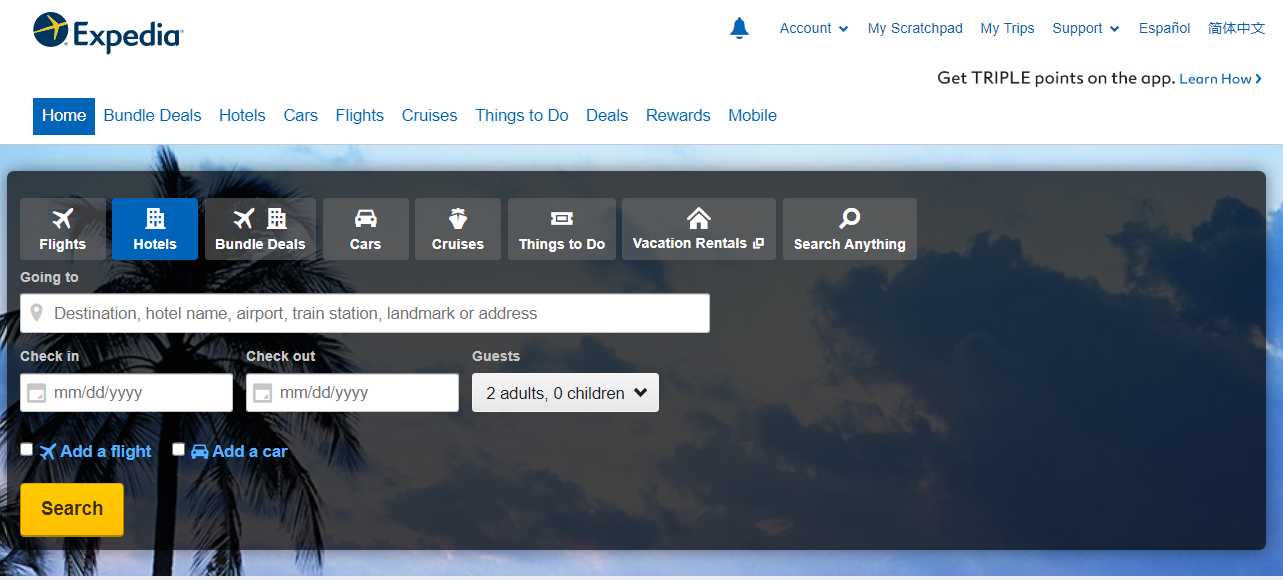</center>

<center><b>Figura 1 | </b> Separador <em>"Hotel"</em> da P√°gina <em>expedia.com</em> em 2016</center> 
<br> 

# Business & Data Understanding

Ap√≥s observarmos os dados escolhidos [[1]](https://www.kaggle.com/competitions/expedia-hotel-recommendations), procur√°mos perceber o que significavam para o problema em quest√£o.

<div style="line-height:50%;">
    <br>
</div>

Deste modo, dado que os dados dizem respeito ao site ***expedia.com*** [[3]](https://www.expedia.com/), pesquis√°mos a forma como este estava estruturado em 2016 (ano em que os dados foram partilhados na competi√ß√£o). A **Fig.1** representa a p√°gina referente √† sec√ß√£o de hot√©is.

<div style="line-height:50%;">
    <br>
</div>

### Observa√ß√µes

- Podemos visualizar que o separador de pesquisa rotulado como ***Going To*** corresponde √†s *features* `srch_destination_id`, `srch_destination_type_id`, `hotel_continent`, `hotel_country` e `hotel_market`. 

- As caixas de sele√ß√£o de datas ***Check in*** e ***Check out*** correspondem, respetivamente, √†s *features* `srch_ci` e `srch_co`. 

- O separador de pesquisa rotulada como **H√≥spedes** corresponde √†s *features* `srch_adults_cnt`, `srch_children_cnt` e `srch_rm_cnt`. 

- A caixa rotulada como ***Add a Flight*** corresponde √† *feature* `is_package`. 

- Adicionalmente, 
    
    - `date_time` corresponde ao dia e hora em que a pesquisa no site foi realizada.
    - `site_name` √© o nome do site visitado, seja o site principal ***Expedia.com*** ou outro; e `posa_continent` √© o continente associado ao site.
    - `orig_destination_distance` √© a dist√¢ncia f√≠sica entre um hotel e um cliente no momento da pesquisa. ($0$ significa que a dist√¢ncia n√£o p√¥de ser calculada).
    - `user_location_country`, `user_location_region`, `user_location_city`, `user_id`, `is_mobile`, `channel`, `is_booking` e `cnt` s√£o atributos determinados pelo local onde o utilizador se encontra, pelo seu dispositivo ou pela sua sess√£o no site *Expedia*. 

<div style="line-height:50%;">
    <br>
</div>

> Atrav√©s desta an√°lise, ao observar a estrutura do site, podemos contextualizar adequadamente todas as vari√°veis, de modo a perceber melhor o problema em quest√£o.

---

# üìö Import das Bibliotecas

In [5]:
# Imports Gerais
import os
import sys

# Imports Python
import numpy as np
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")

# Imports PySpark
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.ml.feature import PCA, VectorAssembler
from pyspark.ml.linalg import Vectors

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

# üßÆ Importar Bases de Dados (csv)

In [7]:
# Import do "train.csv"
filename_aws = "s3://pdb-grupo17-bucket-as/Expedia-Hotel-Recommendations/train.csv"
filename = "Expedia-Hotel-Recommendations/train.csv"
df_train = spark.read.csv(filename_aws, header = True, inferSchema=True, sep=',')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

In [8]:
# Import do "test.csv"
filename_aws = "s3://pdb-grupo17-bucket-as/Expedia-Hotel-Recommendations/test.csv"
filename = "Expedia-Hotel-Recommendations/test.csv"
df_test = spark.read.csv(filename_aws, header = True, inferSchema=True, sep=',')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

In [9]:
# Import do "destinations.csv"
filename_aws = "s3://pdb-grupo17-bucket-as/Expedia-Hotel-Recommendations/destinations.csv"
filename = "Expedia-Hotel-Recommendations/destinations.csv"
df_destinations = spark.read.csv(filename_aws, header = True, inferSchema=True, sep=',')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

## Verifica√ß√£o dos dados
- `printSchema`, `show` e `count`

### Train

In [10]:
# Verifica√ß√£o do dataset train.csv
df_train.printSchema()
df_train.show(1, vertical=True)

# N¬∫ de Colunas (Features) e N¬∫ de Linhas (Observa√ß√µes)
count_obs_train = df_train.count()
count_feat_train = len(df_train.columns)

print("\nN√∫mero de Observa√ß√µes: ", count_obs_train)
print("N√∫mero de Features: ", count_feat_train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

root
 |-- date_time: string (nullable = true)
 |-- site_name: integer (nullable = true)
 |-- posa_continent: integer (nullable = true)
 |-- user_location_country: integer (nullable = true)
 |-- user_location_region: integer (nullable = true)
 |-- user_location_city: integer (nullable = true)
 |-- orig_destination_distance: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- is_mobile: integer (nullable = true)
 |-- is_package: integer (nullable = true)
 |-- channel: integer (nullable = true)
 |-- srch_ci: string (nullable = true)
 |-- srch_co: string (nullable = true)
 |-- srch_adults_cnt: integer (nullable = true)
 |-- srch_children_cnt: integer (nullable = true)
 |-- srch_rm_cnt: integer (nullable = true)
 |-- srch_destination_id: integer (nullable = true)
 |-- srch_destination_type_id: integer (nullable = true)
 |-- is_booking: integer (nullable = true)
 |-- cnt: integer (nullable = true)
 |-- hotel_continent: integer (nullable = true)
 |-- hotel_country: integer (

### Test

In [11]:
# Verifica√ß√£o do dataset test.csv
df_test.printSchema()
df_test.show(1, vertical=True)

# N¬∫ de Colunas (Features) e N¬∫ de Linhas (Observa√ß√µes)
count_obs_test = df_test.count()
count_feat_test = len(df_test.columns)

print("\nN√∫mero de Observa√ß√µes: ", count_obs_test)
print("N√∫mero de Features: ", count_feat_test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

root
 |-- id: integer (nullable = true)
 |-- date_time: string (nullable = true)
 |-- site_name: integer (nullable = true)
 |-- posa_continent: integer (nullable = true)
 |-- user_location_country: integer (nullable = true)
 |-- user_location_region: integer (nullable = true)
 |-- user_location_city: integer (nullable = true)
 |-- orig_destination_distance: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- is_mobile: integer (nullable = true)
 |-- is_package: integer (nullable = true)
 |-- channel: integer (nullable = true)
 |-- srch_ci: string (nullable = true)
 |-- srch_co: string (nullable = true)
 |-- srch_adults_cnt: integer (nullable = true)
 |-- srch_children_cnt: integer (nullable = true)
 |-- srch_rm_cnt: integer (nullable = true)
 |-- srch_destination_id: integer (nullable = true)
 |-- srch_destination_type_id: integer (nullable = true)
 |-- hotel_continent: integer (nullable = true)
 |-- hotel_country: integer (nullable = true)
 |-- hotel_market: integer 

### Coment√°rio

> O conjunto de treino e teste apresentam um n√∫mero diferente de vari√°veis. As colunas diferentes, entre os *datasets*, s√£o `is_booking`, `cnt`, `hotel_cluster` e `id`. 

No in√≠cio pens√°mos em juntar os dois conjuntos para ter a base de dados com o maior n√∫mero de dados poss√≠veis, mas ap√≥s discutirmos as op√ß√µes com o professor cheg√°mos √† conclus√£o de apenas usar o conjunto de treino por ter o maior tamanho e ser poss√≠vel avaliar a qualidade dos modelos que desenvolveremos, dado que a nossa vari√°vel *target* √© `hotel_cluster`. Isto ocorre, porque sendo uma competi√ß√£o, o objetivo seria submeter os resultados no *Kaggle*. 

Adicionalmente, junt√°mos o ficheiro `destinations.csv`, ap√≥s realizar o devido processamento. 

Assim fic√°mos com **37 670 293 observa√ß√µes** para trabalhar nos restantes passos.

### Destinations

In [12]:
# df_destinations.show(1, vertical = True)

# N¬∫ de Colunas (Features) e N¬∫ de Linhas (Observa√ß√µes)
count_obs_destinations = df_destinations.count()
count_feat_destinations = len(df_destinations.columns)

print("\nN√∫mero de Observa√ß√µes: ", count_obs_destinations)
print("N√∫mero de Features: ", count_feat_destinations)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶


N√∫mero de Observa√ß√µes:  62106
N√∫mero de Features:  150

#### Coment√°rio

Como podemos observar, o n¬∫ de colunas referentes a diferentes fatores (p.e., praia, esqui, ...) extra√≠dos das inten√ß√µes dos utilizadores √© excessivamente grande, pelo que usaremos a t√©cnica de redu√ß√£o de dimensionalidade **PCA** de modo a puder usar eficientemente estas vari√°veis na an√°lise do problema.

---

# üìã Evaluate Data

Vamos obter alguns *insights* de dados, com algumas **An√°lise Explorat√≥ria de Dados *(AED)*** com base em estat√≠sticas descritivas e visualiza√ß√µes.

In [13]:
# Vamos trabalhar apenas com o ficheiro "train.csv" - Renomear para df_expedia e Eliminar o df_train e df_test
df_expedia = df_train

del df_train, df_test

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

### Tipos de Dados

Confirm√°mos a correta correspond√™ncia do tipo de dados que representam as *features* no dataset `train.csv` e separ√°mo-las.

In [14]:
# Separa√ß√£o das Colunas conforme o seu Tipo de Dados (int - inteiro | double - decimal | datas)
col_int = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 
           'user_id', 'is_mobile', 'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
           'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 
           'hotel_market', 'hotel_cluster']
col_double = ['orig_destination_distance']
col_datas = ['date_time', 'srch_ci', 'srch_co']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

### Nulls e Valores Distintos
Identifica√ß√£o do n√∫mero de valores nulos ou `NAs` nas colunas.

In [15]:
# Ciclo for para os Valores Nulos por coluna
for cl in df_expedia.columns:
    k = df_expedia.where(F.col(cl).isNull()).count()
    print(f'Coluna {cl}  ->  {k} valores nulos [NaN] ({k*100/count_obs_train:.2f}%)')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

Coluna date_time  ->  0 valores nulos [NaN] (0.00%)
Coluna site_name  ->  0 valores nulos [NaN] (0.00%)
Coluna posa_continent  ->  0 valores nulos [NaN] (0.00%)
Coluna user_location_country  ->  0 valores nulos [NaN] (0.00%)
Coluna user_location_region  ->  0 valores nulos [NaN] (0.00%)
Coluna user_location_city  ->  0 valores nulos [NaN] (0.00%)
Coluna orig_destination_distance  ->  13525001 valores nulos [NaN] (35.90%)
Coluna user_id  ->  0 valores nulos [NaN] (0.00%)
Coluna is_mobile  ->  0 valores nulos [NaN] (0.00%)
Coluna is_package  ->  0 valores nulos [NaN] (0.00%)
Coluna channel  ->  0 valores nulos [NaN] (0.00%)
Coluna srch_ci  ->  47083 valores nulos [NaN] (0.12%)
Coluna srch_co  ->  47084 valores nulos [NaN] (0.12%)
Coluna srch_adults_cnt  ->  0 valores nulos [NaN] (0.00%)
Coluna srch_children_cnt  ->  0 valores nulos [NaN] (0.00%)
Coluna srch_rm_cnt  ->  0 valores nulos [NaN] (0.00%)
Coluna srch_destination_id  ->  0 valores nulos [NaN] (0.00%)
Coluna srch_destination_type

#### Coment√°rios

> Nesta base de dados √© poss√≠vel observar valores nulos (`NA`'s) em apenas 3 colunas. 

- Na coluna `orig_destination_distance` correspondem a $35,90\%$ dos dado. Isso significa que mais de um ter√ßo dos registros n√£o possuem essa informa√ß√£o, mas √© indicado na base de dados que estes resultados negativos significam que a dist√¢ncia entre um cliente e o hotel na altura da pesquisa n√£o pode ser calculada. 

- J√° nas colunas `srch_ci` e `srch_co`, o n√∫mero de valores nulos √© menor, representando apenas $0,12\%$ dos dados de cada coluna. √â de notar que a coluna dos **Check-Ins** `srch_ci` apresenta  $47 083$ valores nulos enquanto a dos **Check-Outs** `srch_co` $47 084$, o que representa que houve um *Check Out* sem *Check In*.

> Uma vez que a propor√ß√£o de dados omissos nas *features* `srch_ci` e `srch_co` √© muito pequena comparada com o total de observa√ß√µes do *dataset* (apenas ~$47000$ observa√ß√µes num total de $37$ milh√µes), iremos eliminar essas observa√ß√µes.

---

In [16]:
# Ciclo for para os Valores Distintos por coluna
for col_name in df_expedia.columns:
    distinct_count = df_expedia.select(col_name).distinct().count()
    print(col_name + "  ->  " + str(distinct_count) + " distinct values")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

date_time  ->  25419546 distinct values
site_name  ->  45 distinct values
posa_continent  ->  5 distinct values
user_location_country  ->  237 distinct values
user_location_region  ->  1008 distinct values
user_location_city  ->  50447 distinct values
orig_destination_distance  ->  8495290 distinct values
user_id  ->  1198786 distinct values
is_mobile  ->  2 distinct values
is_package  ->  2 distinct values
channel  ->  11 distinct values
srch_ci  ->  1270 distinct values
srch_co  ->  1263 distinct values
srch_adults_cnt  ->  10 distinct values
srch_children_cnt  ->  10 distinct values
srch_rm_cnt  ->  9 distinct values
srch_destination_id  ->  59455 distinct values
srch_destination_type_id  ->  10 distinct values
is_booking  ->  2 distinct values
cnt  ->  104 distinct values
hotel_continent  ->  7 distinct values
hotel_country  ->  213 distinct values
hotel_market  ->  2118 distinct values
hotel_cluster  ->  100 distinct values

#### Coment√°rios

Estes valores distintos correspondem √† quantidade de valores √∫nicos em cada coluna da base de dados. 

- Por exemplo, a coluna `date_time` apresenta $25 419 440$ valores distintos, ou seja, existem $25419440$ momentos diferentes em que uma pesquisa/reserva foi registada na base de dados. 

- J√° a coluna `user_location_city`apresenta $50 447$ valores distintos, o que indica que as pesquisas/reservas registadas ocorreram em pelo menos $50 447$ cidades diferentes.

- √â de notas que apenas $\sim1.2 M$ de utilizadores geram $\sim38$ milh√µes de *logs*. Como existe apenas $1.2 M$ utilizadores diferentes e o `cnt` m√©dio (n√∫mero de cliques em uma sess√£o) √© apenas **$\sim1.5$** , significa que os logs dos mesmos utilizadores foram registados em sess√µes diferentes ou em `srch_destination_ids` diferentes.

Esta informa√ß√£o pode ser relevante para uma melhor compreens√£o da diversidade e quantidade de informa√ß√µes dispon√≠veis na base de dados, bem como para auxiliar na escolha de m√©todos de an√°lise apropriados para cada coluna.

---

# üîé AED - An√°lise Explorat√≥ria de Dados 

Nesta fase, faremos uma an√°lise atrav√©s de estat√≠sticas descritivas para obter informa√ß√µes sobre os dados, antes de limp√°-los.

In [17]:
# Breve descri√ß√£o
df_expedia.describe().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

  summary            date_time  ...        hotel_market      hotel_cluster
0   count             37670293  ...            37670293           37670293
1    mean                 None  ...    600.461883638654  49.80860501934509
2  stddev                 None  ...  511.73912727922396  28.91595080500429
3     min  2013-01-07 00:00:02  ...                   0                  0
4     max  2014-12-31 23:59:59  ...                2117                 99

[5 rows x 25 columns]

- Esta tabela sumariza as principais medidas descritivas de todas as *features* do *dataset*.

---

# üìâ PCA

> ***Principal Component Analysis (PCA)*** √© uma t√©cnica de redu√ß√£o de dimensionalidade que procura encontrar combina√ß√µes lineares entre as vari√°veis, de modo a reduzir o seu n√∫mero e aumentando a interpretabilidade dos dados, sem perder muita informa√ß√£o.

No PySpark [[4]](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.PCA.html), esta pode ser implementada com a fun√ß√£o 
`PCA`.

```Python
from pyspark.ml.feature import PCA, VectorAssembler
from pyspark.ml.linalg import Vectors
```

- Escolhemos **k=3** , pois √© um n√∫mero relativamente pequeno em rela√ß√£o ao n√∫mero de vari√°veis originais, o que simplifica a interpreta√ß√£o dos resultados. Al√©m disso, captura a maioria da varia√ß√£o dos dados e, portanto, √© adequado para a an√°lise explorat√≥ria inicial e para a utiliza√ß√£o destas vari√°veis no modelo. 


In [18]:
# An√°lise descritiva do dataset "df_destinations"
df_destinations.describe().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

  summary srch_destination_id  ...                  d148                 d149
0   count               62106  ...                 62106                62106
1    mean  32359.463884326797  ...   -2.2082688195857862   -2.199469787470381
2  stddev  18711.765764703472  ...  0.038569374765216484  0.04243817932980673
3     min                   0  ...        -2.67161285968       -2.67161285968
4     max               64993  ...        -1.71877839769       -1.50030923712

[5 rows x 151 columns]

> √â de notar que no *dataset* que estamos a trabalhar, temos como valor m√°ximo na vari√°vel `srch_destination_id` **$65 107$** , enquanto que no *dataset* `destinations`, $max=64993$.

In [19]:
# Verificar os NAs e Valores Distintos
print("N¬∫ de Observa√ß√µes:", df_destinations.count())
print("N¬∫ de srch_destination_id nulos:", df_destinations.where(F.col("srch_destination_id").isNull()).count())
print("N¬∫ de srch_destination_id distintos:", df_destinations.select("srch_destination_id").distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

N¬∫ de Observa√ß√µes: 62106
N¬∫ de srch_destination_id nulos: 0
N¬∫ de srch_destination_id distintos: 62106

In [20]:
# Converter as colunas num VectorAssembler
assembler = VectorAssembler(inputCols = df_destinations.columns[1:], outputCol="features")
df_destinations_assembler = assembler.transform(df_destinations).select("srch_destination_id", "features")

df_destinations_assembler.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

+-------------------+--------------------+
|srch_destination_id|            features|
+-------------------+--------------------+
|                  0|[-2.19865708695,-...|
|                  1|[-2.18169033283,-...|
|                  2|[-2.18348974514,-...|
|                  3|[-2.17740922654,-...|
|                  4|[-2.18956170511,-...|
+-------------------+--------------------+
only showing top 5 rows

In [21]:
# Criar o modelo PCA com 3 componentes principais
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df_destinations_assembler)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

In [22]:
# Aplicar o modelo PCA aos dados
df_PCA = model.transform(df_destinations_assembler).select("srch_destination_id", "pcaFeatures")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

In [23]:
# Visualizar os resultados
print(df_PCA)
df_PCA.show(5, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

DataFrame[srch_destination_id: int, pcaFeatures: vector]
+-------------------+----------------------------------------------------------+
|srch_destination_id|pcaFeatures                                               |
+-------------------+----------------------------------------------------------+
|0                  |[8.703254917378379,2.6713187917959136,-0.8513837277686267]|
|1                  |[8.306761542149726,2.579304251339471,-0.9754783117904968] |
|2                  |[8.74855519425606,2.5225763278421818,-0.8717974934292955] |
|3                  |[8.267055500246384,2.4615544617628817,-0.9032256996305301]|
|4                  |[8.540269708037473,2.459205494803229,-0.8956499107229742] |
+-------------------+----------------------------------------------------------+
only showing top 5 rows

### Transforma√ß√£o

> Uma vez que a coluna `pcaFeatures` √© do tipo vetor e congrega todos os valores produzidos pelo **PCA**, transform√°mos em 3 colunas separadas

Para tal us√°mos a fun√ß√£o `udf` [[5]](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.udf.html) (User-Defined Function) que permite definir fun√ß√µes personalizadas para serem usadas em opera√ß√µes do PySpark. [[6]](https://stackoverflow.com/questions/33428589/pyspark-and-pca-how-can-i-extract-the-eigenvectors-of-this-pca-how-can-i-calcu)

```Python
from pyspark.sql.functions import udf
```

Esta fun√ß√£o usa os par√¢metros:

- `f` = *function* $\rightarrow$ Fun√ß√£o python a ser usada.
- `returnType`= *pyspark.sql.types.DataType* ou *str* $\rightarrow$ Tipo de dados que queremos que a fun√ß√£o retorne.




In [24]:
# Fun√ß√£o para extrair os valores do vetor pcaFeatures em colunas separadas
def extrair_valores(vector):
    return [float(vector[i]) for i in range(len(vector))]

# Criar a UDF - User Defined Function para alterar o tipo de dados de "pcaFeatures"
pcaFeatures_valores = F.udf(f = extrair_valores, returnType = ArrayType(DoubleType()))

# Aplicar o UDF no DataFrame df_PCA
df_PCA = df_PCA.withColumn("pcaFeature_1", pcaFeatures_valores(df_PCA["pcaFeatures"])[0]) \
               .withColumn("pcaFeature_2", pcaFeatures_valores(df_PCA["pcaFeatures"])[1]) \
               .withColumn("pcaFeature_3", pcaFeatures_valores(df_PCA["pcaFeatures"])[2])

# Resultados
df_PCA.show(5, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

+-------------------+----------------------------------------------------------+-----------------+------------------+-------------------+
|srch_destination_id|pcaFeatures                                               |pcaFeature_1     |pcaFeature_2      |pcaFeature_3       |
+-------------------+----------------------------------------------------------+-----------------+------------------+-------------------+
|0                  |[8.703254917378379,2.6713187917959136,-0.8513837277686267]|8.703254917378379|2.6713187917959136|-0.8513837277686267|
|1                  |[8.306761542149726,2.579304251339471,-0.9754783117904968] |8.306761542149726|2.579304251339471 |-0.9754783117904968|
|2                  |[8.74855519425606,2.5225763278421818,-0.8717974934292955] |8.74855519425606 |2.5225763278421818|-0.8717974934292955|
|3                  |[8.267055500246384,2.4615544617628817,-0.9032256996305301]|8.267055500246384|2.4615544617628817|-0.9032256996305301|
|4                  |[8.5402697080

In [25]:
# Eliminar a coluna "pcaFeatures"
df_PCA = df_PCA.drop("pcaFeatures")

# Confirmar que "pcaFeature_1", "pcaFeature_2" e "pcaFeature_3" s√£o do tipo "double"
df_PCA.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

root
 |-- srch_destination_id: integer (nullable = true)
 |-- pcaFeature_1: double (nullable = true)
 |-- pcaFeature_2: double (nullable = true)
 |-- pcaFeature_3: double (nullable = true)

---

# üíæ Guardar os Dados 

- Para finalizar este notebook e prosseguir para o pr√≥ximo, fizemos o ***merge*** das novas colunas no *dataset* principal (`df_expedia`) e guardamos o *dataset* em formato `parquet` com as altera√ß√µes feitas.

- Para este *join* de tabelas opt√°mos por fazer o ***left join*** [[7]](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.join.html) de modo a acrescentar as colunas, mas n√£o perdendo as observa√ß√µes com `NA`s, dado que ainda estamos numa fase de an√°lise explorat√≥ria.

In [26]:
# Merge das novas colunas "pcaFeature_1", "pcaFeature_2" e "pcaFeature_3" atrav√©s do Left Join tendo por base o "srch_destination_id"
df_expedia_com_PCA = df_expedia.join(df_PCA, on="srch_destination_id", how="left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

In [27]:
# Verificar o merge das novas colunas
print("N¬∫ de Observa√ß√µes:", df_expedia_com_PCA.count())
df_expedia_com_PCA.printSchema()
df_expedia_com_PCA.show(1, vertical= True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

N¬∫ de Observa√ß√µes: 37670293
root
 |-- srch_destination_id: integer (nullable = true)
 |-- date_time: string (nullable = true)
 |-- site_name: integer (nullable = true)
 |-- posa_continent: integer (nullable = true)
 |-- user_location_country: integer (nullable = true)
 |-- user_location_region: integer (nullable = true)
 |-- user_location_city: integer (nullable = true)
 |-- orig_destination_distance: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- is_mobile: integer (nullable = true)
 |-- is_package: integer (nullable = true)
 |-- channel: integer (nullable = true)
 |-- srch_ci: string (nullable = true)
 |-- srch_co: string (nullable = true)
 |-- srch_adults_cnt: integer (nullable = true)
 |-- srch_children_cnt: integer (nullable = true)
 |-- srch_rm_cnt: integer (nullable = true)
 |-- srch_destination_type_id: integer (nullable = true)
 |-- is_booking: integer (nullable = true)
 |-- cnt: integer (nullable = true)
 |-- hotel_continent: integer (nullable = true

In [28]:
# Guardar o dataset "df_expedia_com_PCA"
# df_expedia_com_PCA.write.mode("overwrite").parquet("df-expedia-1")
df_expedia_com_PCA.write.mode("overwrite").parquet("s3://pdb-grupo17-bucket-as/df-expedia-1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),‚Ä¶

---

# üîó Referencias Bibliogr√°ficas

**[1]** References Adam, W. K. (2016). Expedia Hotel Recommendations. Kaggle.com. https://www.kaggle.com/competitions/expedia-hotel-recommendations

**[2]** AISWARYARAMACHANDRAN. (2016). Expedia Hotel Recommendations | Discussions - What does d1-d149 mean in destinations. Kaggle.com. https://www.kaggle.com/competitions/expedia-hotel-recommendations/discussion/20223

**[3]** Expedia. (2022). Expedia Travel: Search Hotels, Cheap Flights, Car Rentals & Vacations. Expedia.com. https://www.expedia.com/ 

**[4]** Apache Spark. (n.d.-a). PCA ‚Äî PySpark 3.3.2 documentation. Spark.apache.org. https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.PCA.html  

**[5]** Apache Spark. (n.d.-b). pyspark.sql.functions.udf ‚Äî PySpark 3.1.3 documentation. Spark.apache.org. https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.udf.html

**[6]** nanounanue. (2015, October 30). apache spark - Pyspark and PCA: How can I extract the eigenvectors of this PCA? How can I calculate how much variance they are explaining? Stack Overflow. https://stackoverflow.com/questions/33428589/pyspark-and-pca-how-can-i-extract-the-eigenvectors-of-this-pca-how-can-i-calcu

**[7]** Apache Spark. (n.d.-b). pyspark.sql.DataFrame.join ‚Äî PySpark 3.1.2 documentation. Spark.apache.org. https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.join.html